In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [53]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")


In [54]:
data.info()
data = data.drop('Address',axis=1)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
new_defaulted = imputer.fit_transform(data)
clustered_data = pd.DataFrame(new_defaulted,columns=data.columns)
clustered_data.info()
X = StandardScaler().fit_transform(clustered_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    float64
 1   Age              850 non-null    float64
 2   Edu              850 non-null    float64
 3   Years Employed   850 non-null    float64
 4   Income           850 non-null    float64
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        850 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(9)
memory usage: 59.9 KB
[[-1.7300143   0.74291541  0.31212243 ... -0.59048916 -0.65560267
  -0.57652509]
 [-1.72593888  1.48949049 -0.76634938 ...  1.51296181 -0.65560267
   0.39138677]
 [-1.72186347 -0.25251804  0.31212243 ...  0.80170393  1.85216712
   1.59755385]
 ...
 [ 1.72186347 -1.24795149  2.46906604 ...  0.03863257  1.85216712
   3.45892281]
 [ 1.72593888 -0.376

In [34]:
k_means = KMeans(init = "k-means++",n_clusters=3,n_init=10)
k_means.fit(X)
labels = k_means.labels_
data["clusters"] = labels

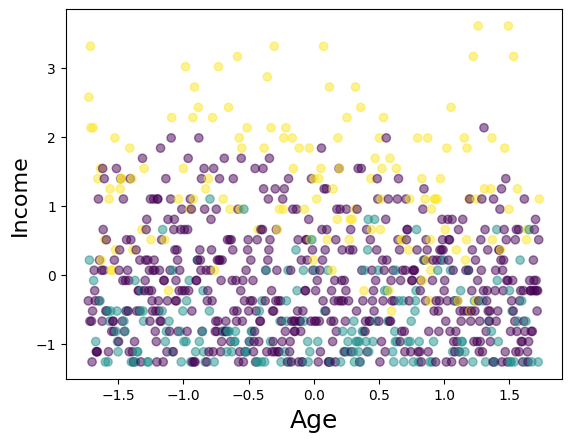

In [56]:
plt.scatter(X[:, 0], X[:, 3],c=labels.astype('float64'), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

In [46]:
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,clusters
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [48]:
print(data["clusters"].value_counts())


clusters
0    526
1    182
2    142
Name: count, dtype: int64


In [51]:
data.groupby("clusters").mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
clusters,,,,,,,,,
0,426.355513,33.986692,1.577947,7.766160,36.281369,0.830241,1.777067,0.000000,7.737072
1,418.131868,31.472527,1.945055,3.884615,32.395604,1.707989,2.954956,0.964706,14.418681
2,431.774648,43.450704,1.901408,17.528169,103.478873,4.174197,8.059282,0.166667,13.746479
